In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr
from scipy import stats

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

hrt = pd.read_csv('vgsales.csv')
hrt

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


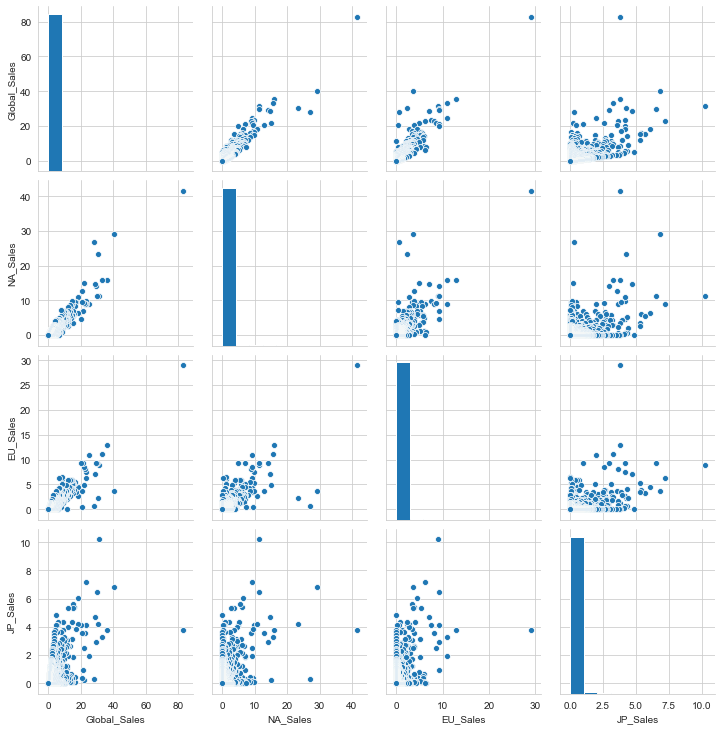

In [2]:
x = hrt[['Global_Sales' ,'NA_Sales', 'EU_Sales', 'JP_Sales']]
x.corr()
sb.pairplot(x)

R-squared for degree 1 =  0.8855701283529854
R-squared for degree 2 =  0.8862867443856269
R-squared for degree 3 =  0.887407511024187
R-squared for degree 4 =  0.8917048913160279
R-squared for degree 5 =  0.8921163239664283


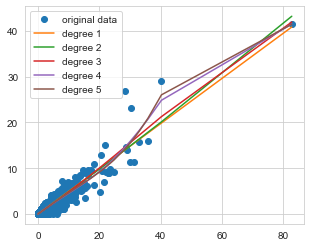

In [3]:
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

x = hrt['Global_Sales']
y = hrt['NA_Sales']
plt.plot(x, y, 'o', label='original data')
lr = lm.LinearRegression()
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y)
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg))
    plt.legend(loc=2)
    print ("R-squared for degree " + str(deg) + " = ", r2_score(y, y_lr))

plt.show()

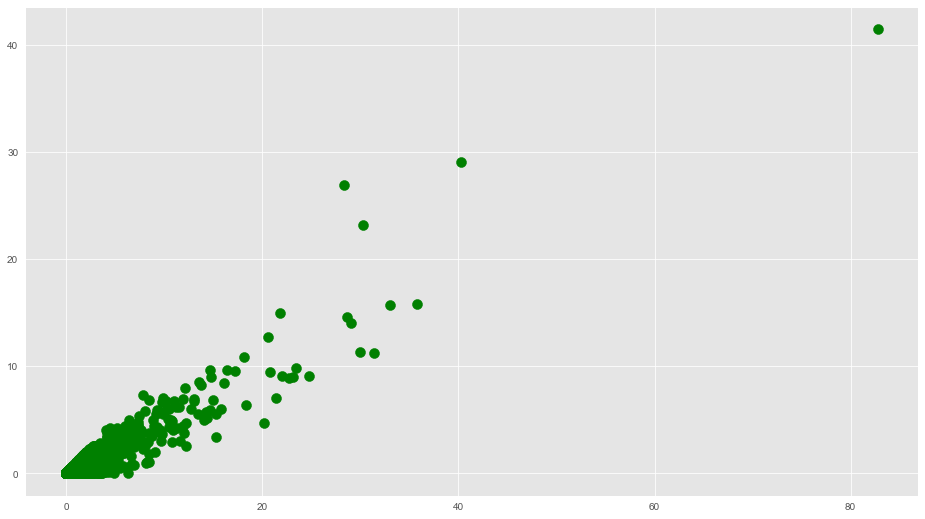

In [4]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

glo = hrt['Global_Sales'].values
na = hrt['NA_Sales'].values
X = np.array(list(zip(glo, na)))
plt.scatter(glo, na, c='green', s=100)

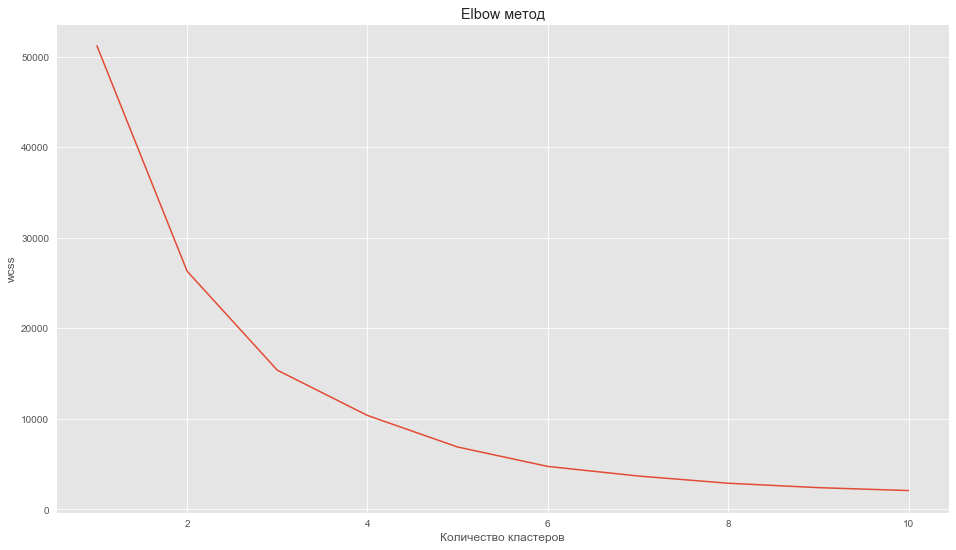

In [5]:
X=hrt.iloc[:,[10,6]].values
#найти идеальное количество кластеров
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow метод')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

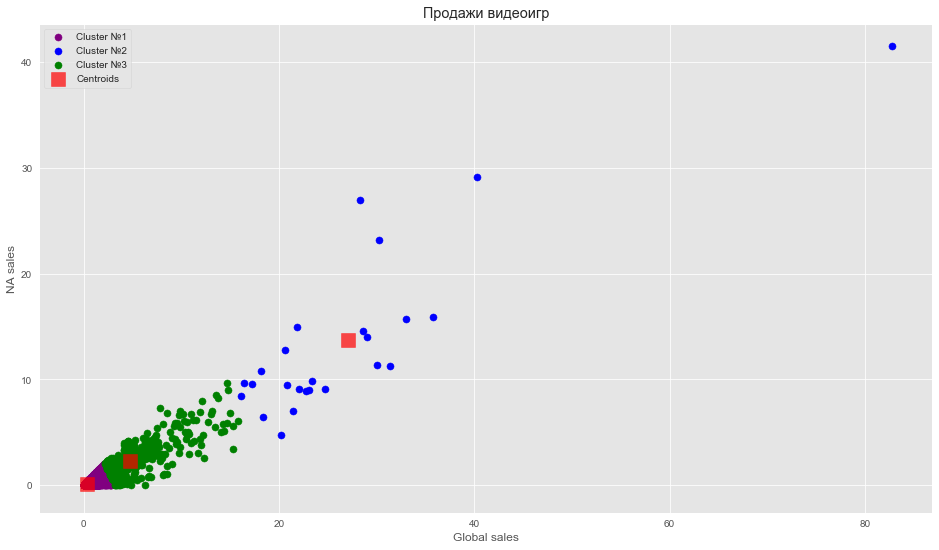

In [6]:
##Подгонка kmeans к набору данных
km4=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Визуализация кластеров для k = 3
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster №1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster №2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster №3')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Продажи видеоигр')
plt.xlabel('Global sales')
plt.ylabel('NA sales')
plt.legend()
plt.show()